# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)
# DAT09 Data Science Capstone: LEGO Case Study
#### by Ryan Peralta

## Background
- The name 'LEGO' is an abbreviation of the two Danish words "leg godt", meaning "play well".
- The key product remains the traditional LEGO brick which was launched in 1958. The interlocking design makes it unique and offers unlimited building possibilities. 
- LEGO gets the imagination going and letting a wealth of creative ideas emerge through play.

<img src="Lego_01.jpeg" alt="LEGO Figurine with Computer" title="LEGO Computer Scientist"/>

## Creativity, Innovation, and Invention
- As per Wikipedia, creativity is a phenomenon whereby something new and somehow valuable is formed. The creation may either be tangible or intangible. Innovation and invention are respectively the implementation of something new and he creation of something that has never been made before and is recognized as the product of some unique insight. Both innovation and invention go hand-in-hand with creativity.

## The Hypothesis
>It would be of interest to see if there is a relationship between LEGO and creativity. Specifics such as price, piece count, theme, age range would be good data points to investigate this.

> Furthermore, we will to try to predict the price of a LEGO set based on the features available and identify which are the most important in driving that price.

<img src="Lego_02.jpg" alt="LEGO Figurine with Magnifying Glass" title="LEGO Sherlock"/>

## Sources of Data
In order to investigate the above hypothesis we will be using the following datasets:
- LEGO dataset from Kaggle https://www.kaggle.com/mterzolo/lego-sets/home which includes the information such as: age, price, reviews, piece count, play rating, description, difficulty, set name, theme, and country.
- Global Creativity Index (GCI) from http://martinprosperity.org/content/the-global-creativity-index-2015/ which includes country rankings across technology, talent, and tolerance - which are ultimately summarized into a single number index. The table in the webpage will be converted into a CSV file for purposes of this case study.

## Data Preparation & Exploratory Data Analysis
#### Loading the data sets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
legofile = "lego_sets.csv"
gcifile = "GCI.csv"

dfl = pd.read_csv(legofile)
dfg = pd.read_csv(gcifile)

#### Starting dataframes insights

In [3]:
dfl.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US


In [4]:
dfg.head()

,Ranking,Country,Technology,Talent,Tolerance,Global Creativity Index
0,1,Australia,7,1,4,0.970
1,2,United States,4,3,11,0.950
2,3,New Zealand,7,8,3,0.949
3,4,Canada,13,14,1,0.920
4,5,Denmark,10,6,13,0.917


#### Combining LEGO and GCI dataframes
> In order to combine the LEGO dataframe the the GCI dataframe, we will need to map the countries' ISO 3166 codes from https://datahub.io/core/country-list#resource-country-list_zip using the CSV file in the link.

<img src="Lego_06.jpg" alt="LEGO Woman Scientist" title="LEGO Combine"/>

In [5]:
isofile = "country_code.csv"
dfc = pd.read_csv(isofile)
dfc.head()

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [6]:
dfg.Country = dfg.Country.map(dfc.set_index('Name').Code)
dfg = dfg.rename(columns = {'Country':'country'})
dfg.head()

,Ranking,country,Technology,Talent,Tolerance,Global Creativity Index
0,1,AU,7,1,4,0.970
1,2,US,4,3,11,0.950
2,3,NZ,7,8,3,0.949
3,4,CA,13,14,1,0.920
4,5,DK,10,6,13,0.917


> Creating the dataframe that we will use to continue to do the analysis by using merge.

In [7]:
df = dfg.merge(dfl, on='country', how='inner')
df.columns = map(str.lower, df.columns)
df.head()

,ranking,country,technology,talent,tolerance,global creativity index,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating
0,1,AU,7,1,4,0.97,12+,113.9924,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3
1,1,AU,7,1,4,0.97,12+,75.9924,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1
2,1,AU,7,1,4,0.97,12+,60.7924,7.0,597.0,3.7,Celebrate Shanghai with this LEGO® Architectur...,21039.0,Recreate Shanghai in China's blend of historic...,Average,Shanghai,4.9,Architecture,4.4
3,1,AU,7,1,4,0.97,12+,53.1924,24.0,780.0,4.4,Recreate Buckingham Palace with LEGO® Architec...,21029.0,Build a LEGO® brick model of London's official...,Average,Buckingham Palace,4.7,Architecture,4.3
4,1,AU,7,1,4,0.97,12+,53.1924,37.0,598.0,3.7,Celebrate New York City with this LEGO® Archit...,21028.0,Celebrate the architectural diversity of New Y...,Average,New York City,4.2,Architecture,4.1


> Renaming columns prior to checking the tail.

In [8]:
rename = {'global creativity index':'creativity'} 
df.rename(columns=rename, inplace=True)
df.tail()

,ranking,country,technology,talent,tolerance,creativity,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating
11681,46,PL,46,25,101,0.516,8-14,40.5971,8.0,341.0,4.2,Take on the tentacular Flying Jelly Sub with Jay!,70610.0,Join ninja Jay in battle against the shark arm...,Average,Flying Jelly Sub,4.6,THE LEGO® NINJAGO® MOVIE™,4.5
11682,46,PL,46,25,101,0.516,7-14,40.5971,6.0,341.0,4.4,Protect NINJAGO® City from flying Manta Ray Bo...,70609.0,Help Cole save Shen-Li in this cool THE LEGO® ...,Easy,Manta Ray Bomber,4.3,THE LEGO® NINJAGO® MOVIE™,4.2
11683,46,PL,46,25,101,0.516,7-14,26.0971,8.0,217.0,4.1,Stop a Piranha Attack with Kai and Misako!,70629.0,Play out an action-packed Piranha Mech pursuit...,Easy,Piranha Attack,3.6,THE LEGO® NINJAGO® MOVIE™,4.1
11684,46,PL,46,25,101,0.516,7-14,26.0971,18.0,233.0,4.6,Stop a crime in the NINJAGO® City street market!,70607.0,"Team up with Lloyd Garmadon, Nya and Officer T...",Easy,NINJAGO® City Chase,4.6,THE LEGO® NINJAGO® MOVIE™,4.5
11685,46,PL,46,25,101,0.516,6-14,13.0471,NaN,48.0,NaN,Achieve Spinjitzu greatness with the Green Ninja!,70628.0,Learn all the skills of Spinjitzu with THE LEG...,NaN,Lloyd - Spinjitzu Master,NaN,THE LEGO® NINJAGO® MOVIE™,NaN


#### Missing Values

There seems to be missing values in num_reviews, play_star_rating, prod_desc, review_difficulty, star_rating, theme_name, val_star rating.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11686 entries, 0 to 11685
Data columns (total 19 columns):
ranking              11686 non-null int64
country              11686 non-null object
technology           11686 non-null object
talent               11686 non-null object
tolerance            11686 non-null object
creativity           11686 non-null float64
ages                 11686 non-null object
list_price           11686 non-null float64
num_reviews          10143 non-null float64
piece_count          11686 non-null float64
play_star_rating     9996 non-null float64
prod_desc            11327 non-null object
prod_id              11686 non-null float64
prod_long_desc       11686 non-null object
review_difficulty    9729 non-null object
set_name             11686 non-null object
star_rating          10143 non-null float64
theme_name           11683 non-null object
val_star_rating      9977 non-null float64
dtypes: float64(8), int64(1), object(10)
memory usage: 1.8+ MB


#### Strategy to deal with missing values
- We will apply the mean for the following: num_reviews, play_star_rating, star_rating, and val_star_rating.
- We will drop (1) prod_desc given the presence of prod_long_desc and (2) the 3 rows without the theme name.
- We will explore using a model to fill in missing values for review_difficulty.

<img src="Lego_03.jpg" alt="LEGO Batman Missing Pieces" title="LEGO Missing Pieces"/>

In [10]:
missing = ['num_reviews','play_star_rating','star_rating','val_star_rating']
for x in missing:
    df[x].fillna(df[x].mean(), inplace=True)

In [11]:
df.drop(columns='prod_desc', inplace=True)

In [12]:
df.dropna(subset=['theme_name'], inplace=True)

In [13]:
df[df.review_difficulty.isnull()].head()

,ranking,country,technology,talent,tolerance,creativity,ages,list_price,num_reviews,piece_count,play_star_rating,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating
19,1,AU,7,1,4,0.97,10+,12.1524,1.000000,136.0,4.337585,41607.0,This Gamora LEGO® BrickHeadz construction char...,NaN,Gamora,5.000000,BrickHeadz,4.229398
29,1,AU,7,1,4,0.97,10+,22.7924,16.826383,209.0,4.337585,41610.0,These LEGO® BrickHeadz™ 41610 Tactical Batman™...,NaN,Tactical Batman™ & Superman™,4.514286,BrickHeadz,4.229398
38,1,AU,7,1,4,0.97,7-12,121.5924,1.000000,883.0,5.000000,60188.0,Grab your hard hat and head out to the LEGO® C...,NaN,Mining Experts Site,5.000000,City,5.000000
51,1,AU,7,1,4,0.97,5-12,45.5924,16.826383,387.0,4.337585,60175.0,Pick up your badge and join the LEGO® City Mou...,NaN,Mountain River Heist,4.514286,City,4.229398
52,1,AU,7,1,4,0.97,5-12,37.9924,16.826383,297.0,4.337585,60172.0,Pick up your badge and join the LEGO® City Mou...,NaN,Dirt Road Pursuit,4.514286,City,4.229398


#### Explore using a model to predict the values for review_difficulty
> We will use the piece_count and play_star_rating as the features to help classify missing values for review_difficulty. Source https://towardsdatascience.com/the-tale-of-missing-values-in-python-c96beb0e8a9d. The process goes thus:
- Call the variable where you have missing values as y.
- Split data into sets with missing values and without missing values, name the missing set X_test and the one without missing values X_train and take y (variable or feature where there is missing values) off the second set, naming it y_train.
- Use one of classification methods to predict y_pred.
- Add it to X_test as your y_test column. Then combine sets together.

<img src="Lego_04.png" alt="LEGO Classifier" title="LEGO Classifier"/>

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

dfr_test = df[df.review_difficulty.isnull()]
dfr_train = df.dropna()
dfr_results = dfr_test.drop(['review_difficulty'], axis=1)

feature_cols = ['piece_count', 'play_star_rating']

y_pred = dfr_test.review_difficulty
X_test = dfr_test[feature_cols]

y_train = dfr_train.review_difficulty
X_train = dfr_train[feature_cols]

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_s, y_train)

y_pred = knn.predict(X_test_s)
y = y_pred.tolist()

columns=['review_difficulty']
index=dfr_results.index.values.tolist()

ydf = pd.DataFrame(y,columns=columns,index=index)
dfr_results = dfr_results.join(ydf)

frames = [dfr_train, dfr_results]
dfr = pd.concat(frames, sort=True)

#### Working dataframe insights
Missing values have been dealt with, now we start to work with our working dataframe:
- Changing data type for talent, technology, tolerance which are numerical anyways as per documentation.
- Changing review_difficulty from categorical into numerical using get_dummies - but combining data points to fix imbalance

In [15]:
dfr['talent'] = dfr['talent'].astype(int)
dfr['technology'] = dfr['technology'].astype(int)
dfr['tolerance'] = dfr['tolerance'].astype(int)

In [16]:
dfr.review_difficulty.value_counts()

Easy                5195
Average             4079
Very Easy           1316
Challenging         1086
Very Challenging       7
Name: review_difficulty, dtype: int64

In [17]:
dfr.review_difficulty.replace('Very Easy','easy',inplace=True)
dfr.review_difficulty.replace('Easy','easy',inplace=True)
dfr.review_difficulty.replace('Average','challenging',inplace=True)
dfr.review_difficulty.replace('Challenging','challenging',inplace=True)
dfr.review_difficulty.replace('Very Challenging','challenging',inplace=True)
dfr.review_difficulty.value_counts()

easy           6511
challenging    5172
Name: review_difficulty, dtype: int64

In [18]:
dfd = dfr.copy()
dfd = pd.get_dummies(dfd, columns=['review_difficulty'], prefix = ['difficulty'])
dfd = pd.get_dummies(dfd, columns=['country'], prefix = ['country'])

In [19]:
dfd.head()

,ages,creativity,list_price,num_reviews,piece_count,play_star_rating,prod_id,prod_long_desc,ranking,set_name,...,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT,country_US
0,12+,0.97,113.9924,23.0,1032.0,3.6,21030.0,Discover the architectural secrets of the icon...,1,United States Capitol Building,...,0,0,0,0,0,0,0,0,0,0
1,12+,0.97,75.9924,14.0,744.0,3.2,21035.0,Discover the architectural secrets of Frank Ll...,1,Solomon R. Guggenheim Museum®,...,0,0,0,0,0,0,0,0,0,0
2,12+,0.97,60.7924,7.0,597.0,3.7,21039.0,Recreate Shanghai in China's blend of historic...,1,Shanghai,...,0,0,0,0,0,0,0,0,0,0
3,12+,0.97,53.1924,24.0,780.0,4.4,21029.0,Build a LEGO® brick model of London's official...,1,Buckingham Palace,...,0,0,0,0,0,0,0,0,0,0
4,12+,0.97,53.1924,37.0,598.0,3.7,21028.0,Celebrate the architectural diversity of New Y...,1,New York City,...,0,0,0,0,0,0,0,0,0,0


In [20]:
dfd.tail()

,ages,creativity,list_price,num_reviews,piece_count,play_star_rating,prod_id,prod_long_desc,ranking,set_name,...,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT,country_US
11568,8-14,0.516,37.6971,16.826383,104.0,4.337585,75537.0,Bolster your LEGO® Star Wars collection with t...,46,Darth Maul™,...,0,0,0,0,0,0,0,1,0,0
11569,8-14,0.516,37.6971,16.826383,101.0,4.337585,75535.0,Play out exciting adventures with this highly ...,46,Han Solo™,...,0,0,0,0,0,0,0,1,0,0
11640,7-14,0.516,26.0971,1.000000,135.0,5.000000,42072.0,Experience the amazing power and acceleration ...,46,WHACK!,...,0,0,0,0,0,0,0,1,0,0
11661,7-14,0.516,34.7971,2.000000,198.0,4.000000,70918.0,Glide over bumps in the Gotham City streets an...,46,The Bat-Dune Buggy,...,0,0,0,0,0,0,0,1,0,0
11685,6-14,0.516,13.0471,16.826383,48.0,4.337585,70628.0,Learn all the skills of Spinjitzu with THE LEG...,46,Lloyd - Spinjitzu Master,...,0,0,0,0,0,0,0,1,0,0


In [21]:
dfd.shape

(11683, 38)

In [22]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 11685
Data columns (total 38 columns):
ages                      11683 non-null object
creativity                11683 non-null float64
list_price                11683 non-null float64
num_reviews               11683 non-null float64
piece_count               11683 non-null float64
play_star_rating          11683 non-null float64
prod_id                   11683 non-null float64
prod_long_desc            11683 non-null object
ranking                   11683 non-null int64
set_name                  11683 non-null object
star_rating               11683 non-null float64
talent                    11683 non-null int64
technology                11683 non-null int64
theme_name                11683 non-null object
tolerance                 11683 non-null int64
val_star_rating           11683 non-null float64
difficulty_challenging    11683 non-null uint8
difficulty_easy           11683 non-null uint8
country_AT               

In [23]:
dfd.describe()

,creativity,list_price,num_reviews,piece_count,play_star_rating,prod_id,ranking,star_rating,talent,technology,...,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT,country_US
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,1.168300e+04,11683.000000,11683.000000,11683.000000,11683.000000,...,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000
mean,0.823989,65.628233,16.828478,493.429171,4.337586,5.981620e+04,15.013438,4.514298,19.510913,18.427031,...,0.049302,0.048532,0.047077,0.046991,0.049302,0.046991,0.048361,0.045365,0.046820,0.069931
std,0.114042,92.745505,33.873470,825.194767,0.603196,1.638049e+05,10.884040,0.483500,11.619876,10.704840,...,0.216508,0.214897,0.211813,0.211629,0.216508,0.211629,0.214537,0.208112,0.211263,0.255041
min,0.516000,2.272400,1.000000,1.000000,1.000000,6.300000e+02,1.000000,1.800000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.788000,19.990000,3.000000,97.000000,4.100000,2.103400e+04,5.000000,4.300000,11.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.837000,36.587800,8.000000,216.000000,4.400000,4.206900e+04,14.000000,4.600000,20.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.917000,71.298000,16.826383,544.000000,4.700000,7.092200e+04,20.000000,4.900000,26.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.970000,1104.870000,367.000000,7541.000000,5.000000,2.000431e+06,46.000000,5.000000,48.000000,46.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From our exploratory data analysis using dfd.corr() and a seaborn heatmap, we can observe the following:
- Weak correlation between data points from the LEGO dataset with the GCI datasets. As such, we do not have the support to be able to accept the earlier stated hypothesis
- There is a strong correlation between the target - list_price, with the features - difficulty_challenging, prod_id, piece_count, num_reviews

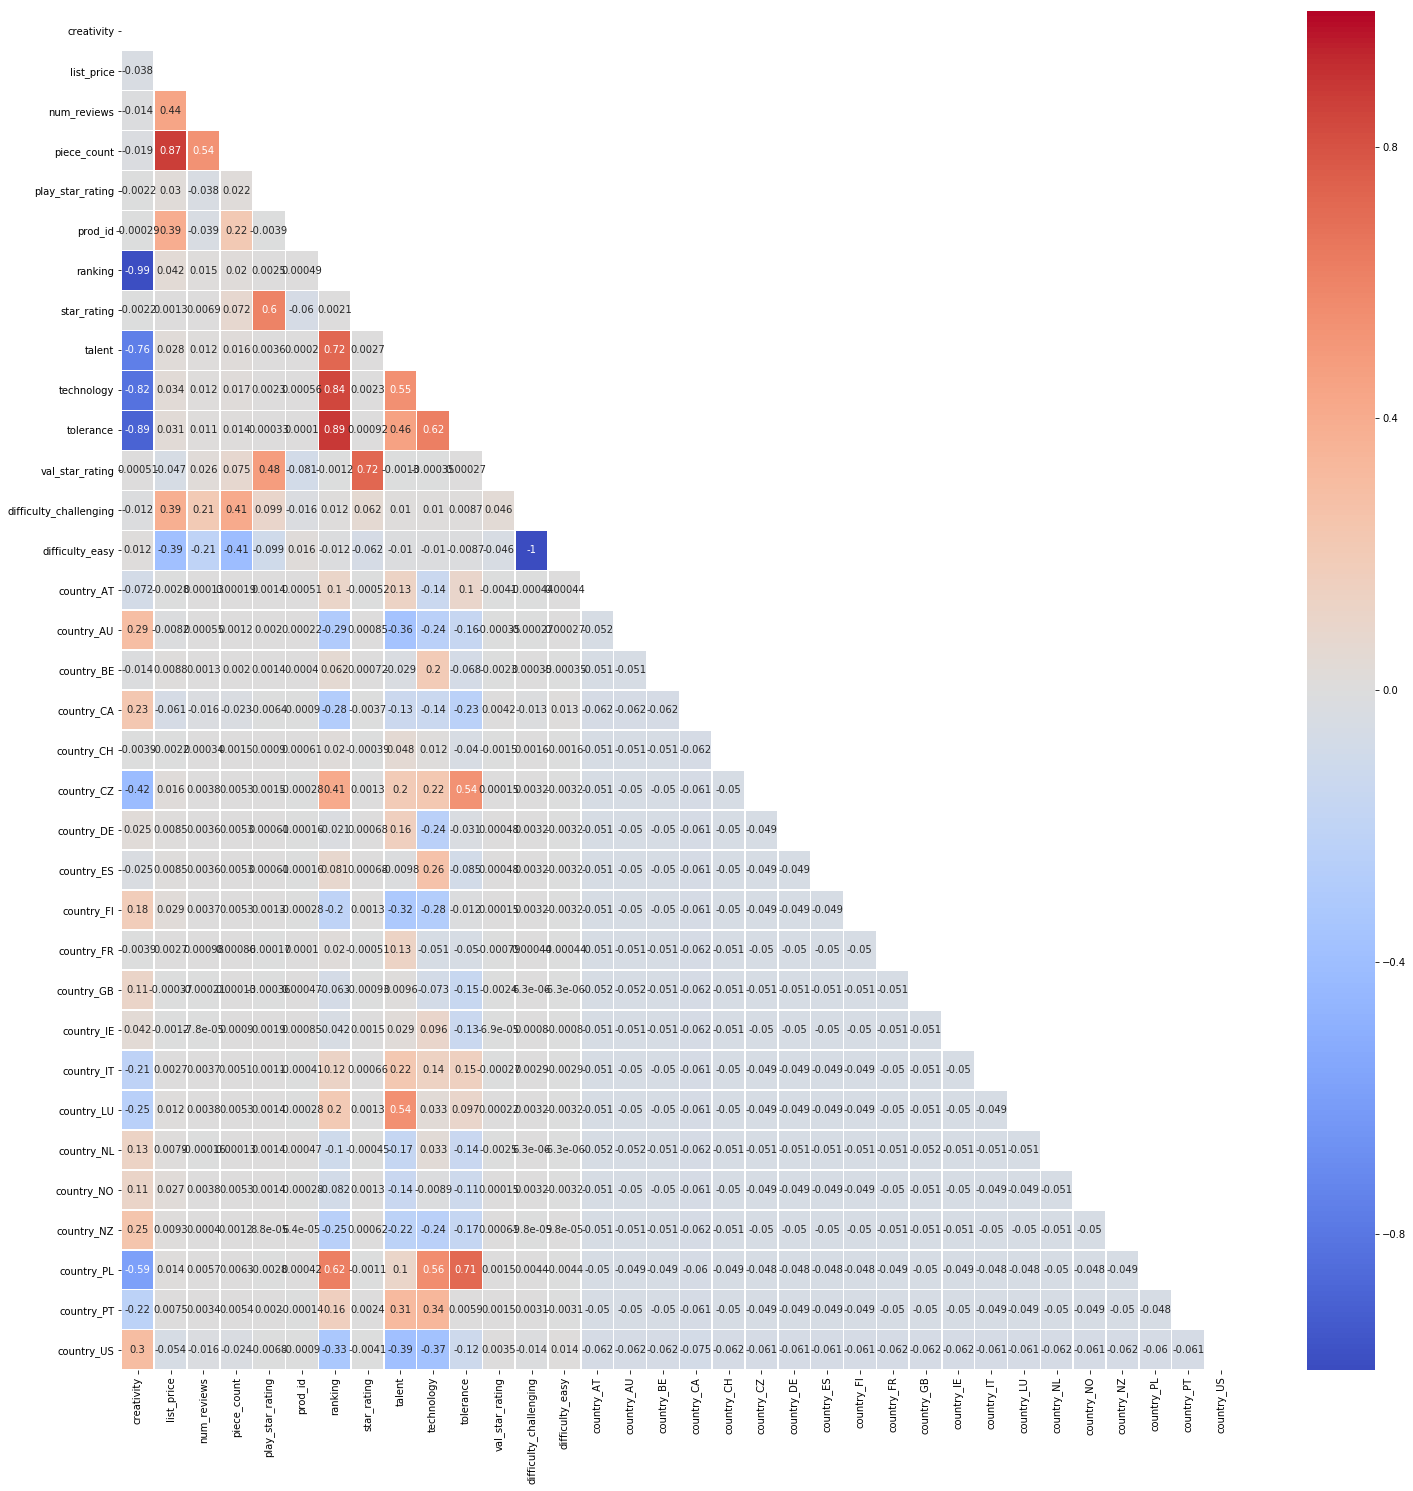

In [24]:
f,ax=plt.subplots(figsize=(25,25))
mask = np.zeros_like(dfd.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dfd.corr(), mask=mask, cmap = 'coolwarm', annot=True, ax=ax, linewidth=.5)

## Building the Machine Learning Models
#### Creating the training and testing sets
<img src="Lego_08.jpg" alt="LEGO Office" title="LEGO Office"/>

In [25]:
from sklearn import metrics

dfx = dfd.copy()
not_features=['list_price','ages','prod_long_desc', 'set_name', 'theme_name']
X = dfx.drop(columns=not_features)
y = dfd.list_price

from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.25)

#### Applying Machine Learning
##### Linear Regression

In [26]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_lr = linreg.predict(X_test)


acc_lr = round(linreg.score(X_train,y_train) * 100, 2)
print(round(acc_lr,2,), "%")
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr)))

80.95 %
MAE: 19.67617910978036
MSE: 1637.016852843065
RMSE: 40.460064913974925


##### Random Forest Regressor

In [27]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf)))

99.75 %
MAE: 3.6113165657879738
MSE: 87.58623460946794
RMSE: 9.358751765565103


##### Nearest Neighbors Regression
###### Finding k

In [28]:
rmse=[]
for k in range(20):
    k=k+1
    knn=neighbors.KNeighborsRegressor(n_neighbors = k)

    knn.fit(X_train, y_train)
    y_pred_knn=knn.predict(X_test)
    error = sqrt(mean_squared_error(y_test,y_pred_knn))
    rmse.append(error)
    print('RMSE value for k= ' , k , 'is:', error)

RMSE value for k=  1 is: 21.7048244305962
RMSE value for k=  2 is: 17.27552916440555
RMSE value for k=  3 is: 15.441703139885853
RMSE value for k=  4 is: 15.000579570225138
RMSE value for k=  5 is: 14.535943572680454
RMSE value for k=  6 is: 14.56284181596041
RMSE value for k=  7 is: 14.281185826637156
RMSE value for k=  8 is: 14.61132610408024
RMSE value for k=  9 is: 14.637550889881963
RMSE value for k=  10 is: 14.855854707096437
RMSE value for k=  11 is: 15.106592875401695
RMSE value for k=  12 is: 15.598170358644715
RMSE value for k=  13 is: 16.654602792578725
RMSE value for k=  14 is: 17.970616657716896
RMSE value for k=  15 is: 19.176664471875796
RMSE value for k=  16 is: 20.379656169013735
RMSE value for k=  17 is: 21.654862699446987
RMSE value for k=  18 is: 23.00099439461778
RMSE value for k=  19 is: 24.270765267315973
RMSE value for k=  20 is: 25.49168317414352


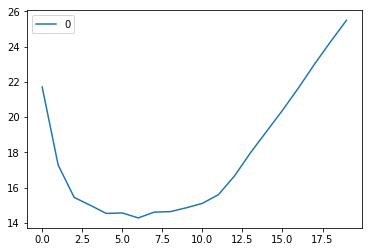

In [29]:
curve = pd.DataFrame(rmse)
curve.plot()

###### Applying k to find the accuracy

In [30]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 7)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_knn))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_knn)))

97.68 %
MAE: 6.836947909228737
MSE: 203.95226861494197
RMSE: 14.281185826637156


> From the above, we can see that the Random Forest Regressor performs better than the linear regression and nearest neighbor regression.

## K-Fold Cross Validation
#### Five-fold Cross Validation

In [31]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits=5, shuffle=True)

rmse_rf = []
scores = []
n = 0

print('CROSS VALIDATION each fold:')
for train_index, test_index in kf.split(X_train, y_train):
    rf  = RandomForestRegressor().fit(X.iloc[train_index], y.iloc[train_index])
    
    rmse_rf.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], rf.predict(X.iloc[test_index]))))
    scores.append(rf.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('RMSE: {}'.format(rmse_rf[n-1]))
    print('R2: {}\n'.format(scores[n-1])) 
    #print('Coefficients: \n', lr.coef_)

print("SUMMARY OF CROSS VALIDATION")
print('Mean of RMSE for all folds: {}'.format(np.mean(rmse_rf)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

CROSS VALIDATION each fold:
Model 1
RMSE: 9.92555163675574
R2: 0.9896284225483656

Model 2
RMSE: 14.055239219836558
R2: 0.9659996843891182

Model 3
RMSE: 11.176828487912632
R2: 0.987167804600718

Model 4
RMSE: 11.212958624759851
R2: 0.9910742565719959

Model 5
RMSE: 11.951441516812766
R2: 0.9835144728127526

SUMMARY OF CROSS VALIDATION
Mean of RMSE for all folds: 11.664403897215509
Mean of R2 for all folds: 0.9834769281845901


#### Ten-fold Cross Validation

In [32]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits=10, shuffle=True)

rmse_rf = []
scores = []
n = 0

print('CROSS VALIDATION each fold:')
for train_index, test_index in kf.split(X_train, y_train):
    rf  = RandomForestRegressor().fit(X.iloc[train_index], y.iloc[train_index])
    
    rmse_rf.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], rf.predict(X.iloc[test_index]))))
    scores.append(rf.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('RMSE: {}'.format(rmse_rf[n-1]))
    print('R2: {}\n'.format(scores[n-1])) 
    #print('Coefficients: \n', lr.coef_)

print("SUMMARY OF CROSS VALIDATION")
print('Mean of RMSE for all folds: {}'.format(np.mean(rmse_rf)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

CROSS VALIDATION each fold:
Model 1
RMSE: 13.67736879210593
R2: 0.988866371652437

Model 2
RMSE: 9.968283084277287
R2: 0.9803276969750675

Model 3
RMSE: 12.359815359719788
R2: 0.9915041282528012

Model 4
RMSE: 9.545161023495009
R2: 0.9893122092208291

Model 5
RMSE: 16.673526463339037
R2: 0.9821072184122017

Model 6
RMSE: 9.664732734560737
R2: 0.9876186755420282

Model 7
RMSE: 9.290613884744673
R2: 0.9854577666261861

Model 8
RMSE: 12.244745661628645
R2: 0.9911577898260089

Model 9
RMSE: 27.005509779647554
R2: 0.9426845149191005

Model 10
RMSE: 10.317599364975319
R2: 0.9887751083265404

SUMMARY OF CROSS VALIDATION
Mean of RMSE for all folds: 13.074735614849397
Mean of R2 for all folds: 0.9827811479753201


Using five-fold cross validation and ten-fold cross validation, RMSE across the models are relatively close to the RMSE mean and high R2 across the models and comparable to the model score.

#### Using Random Forest Importance to Tune Linear Regression
##### Getting and summarizing feature importance

In [33]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)

,importance
feature,
piece_count,0.768
prod_id,0.132
val_star_rating,0.043
num_reviews,0.024
star_rating,0.009
play_star_rating,0.005
creativity,0.003
tolerance,0.003
ranking,0.002


##### Using the features and creating the linear regression model

In [34]:
dfz = dfd.copy()
features=['piece_count','val_star_rating','num_reviews']

Xz = dfz[features]
yz = dfd.list_price

X_train, X_test, y_train, y_test = train_test_split(Xz, yz, random_state=99, test_size=0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_lr = linreg.predict(X_test)


acc_lr = round(linreg.score(X_train,y_train) * 100, 2)
print(round(acc_lr,2,), "%")
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr)))

75.83 %
MAE: 20.390070101168355
MSE: 2067.2354091378365
RMSE: 45.466860559509016


## Conclusions and Recommendations
> On the first hypothesis, we have seen there is no strong relationship between LEGO and creativity.

> On the second hypothesis, we have been able to create a model that can help predict the price of a LEGO set - and also knowing that the key features that will determine the price are piece_count, val_star_rating, num_reviews, and difficulty.

> It would be good to find a dataset to see if we can have a stronger relationship between LEGO and creativity and be able to predict the ranking of the market based on the features of this combined data set.

<img src="Lego_09.gif" alt="LEGO Saying" title="LEGO Saying" width="300" class="center">


<img src="LinkedIn.jpeg"/><img src="Lego_07.jpg" alt="LEGO End" title="LEGO End"/>